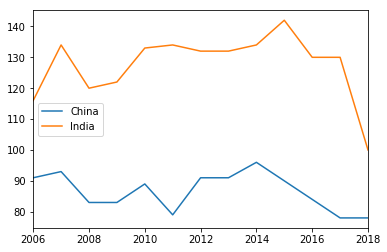

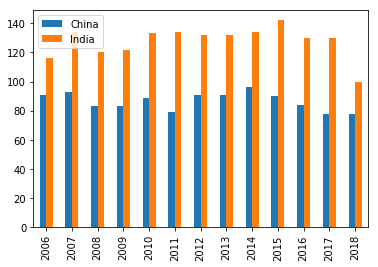

In [83]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

link='https://en.wikipedia.org/wiki/Ease_of_doing_business_index'

page = requests.get(link)
soup = BeautifulSoup(page.text, 'html.parser')

tables=soup.find('table', attrs={'class': "wikitable"})

rows=table.find_all('tr')

i=0
columns=[]
data={}
for row in rows:
    if i == 0:
        headerrow = row
        ths=headerrow.find_all('th', attrs={'scope': 'col'})
        
        for th in ths:
            columns.append(th.text)
    else:
        index=''
        j=0
        tds=row.find_all('td')
        
        for td in tds:
            
           
            if j == 0:
                index=td.text.replace('\xa0','')
                data[index]=[]
            else:
                data[index].append(td.text)
            j=j+1
    i=i+1

df= pd.DataFrame(data)
df=df.T 
df.columns=columns[1:]
df.replace('N/A',np.NaN, inplace=True)
df=df.apply(lambda x: x.str.replace('*', ''))
df.sort_index(axis=1, inplace=True)
df=df.astype(float)
countries=['India', 'China']
df=df.loc[df.index.isin(countries)]

df.T.plot(kind='line', sort_columns=True)
df.T.plot(kind='bar', sort_columns=True)
